In [10]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt
from google.cloud import vision
import io
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()
!sudo apt install tesseract-ocr -y
!sudo apt install libtesseract-dev -y
!sudo apt install tesseract-ocr-kor -y

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-kor is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [11]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python' 
image_paths = [
    work_dir + '/test1.jpg',
    work_dir + '/test2.jpg',
    work_dir + '/test3.jpg',
    work_dir + '/test4.jpg',
    work_dir + '/engtest1.jpg',
    work_dir + '/engtest2.jpg',
    work_dir + '/engtest3.jpg',
    work_dir + '/engtest4.jpg',
    work_dir + '/engtest5.jpg',
]

Google OCR API

In [12]:
googleocr=[]
def detect_text(path):
    """Detects text in the file."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    googleocr.append(len(texts))
    print(len(texts))
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [13]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
#!ls -l ~GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for i in range(len(image_paths)):
    detect_text(image_paths[i])

64
Texts:

"삼일인포마인
삼일회계법인
회계관리 ⑦ 계리
원리
삼일회계법인 저
DE
선형대수학
Linear Algebra
and Its Applications
김
PEARSON
KO
유 장고·부트스트랩 파이썬 웹 개발의 정석
이성용
김태곤 지음
이지스퍼블리싱
똑똑하게 코딩하는 법 파이션 코딩의 기술
브렛 슬라킨 지음 | 오현석 옮김
2018
전면개정
국가공인
"

"삼일"

"인포"

"마인"

"삼일"

"회계"

"법인"

"회계"

"관리"

"⑦"

"계리"

"원리"

"삼일"

"회계"

"법인"

"저"

"DE"

"선형"

"대수학"

"Linear"

"Algebra"

"and"

"Its"

"Applications"

"김"

"PEARSON"

"KO"

"유"

"장고"

"·"

"부트"

"스트랩"

"파이썬"

"웹"

"개발"

"의"

"정석"

"이성용"

"김태곤"

"지음"

"이지스"

"퍼블리싱"

"똑똑"

"하게"

"코딩"

"하는"

"법"

"파이"

"션"

"코딩"

"의"

"기술"

"브렛"

"슬라"

"킨"

"지음"

"|"

"오현석"

"옮김"

"2018"

"전면"

"개정"

"국가"

"공인"
bounds: (324,691),(314,515),(389,511),(399,687)
75
Texts:

"| 회계관리 ④
급 계리
2 회원
삼일인포마인
삼일회계법인
삼일회계법인 저
K 선형대수학
Linear Algebra
PEARSON
and Its Applications
8근 장고·부트스트랩 파이썬 웹 개발의 정석
이성용
김태곤 지음
이지스퍼블리싱
파이썬 코딩의 기술
똑똑하게 코딩하는 법
브렛 슬라킨 지음 | 오현석 옮김
제4판
David C. Lay
김병학 · 김진용
박성일· 하성남
한창용· 홍범일
"

"|"

"회계"

"관리"

"④"

"급"

"계리"

"2"

"회원"

"삼일"

"인포"

"마인"

"삼일"

"회계"

"법인"

"삼일"

"회계"

"법인"

"저"

64
Texts:

"DRN BCTT CARD
ENDER'S CAME
a tale of two Cnturies
BEFORE MY EYES CAROLINE BOCK
MATSON
N
ANTIGODDESS KENDARE
BLAKE
CLOCKWORK SCARAB
LEASON
CUEEINTELE RO ess
FANGIRL
RAINBOW ROWELL
GENNTFER
ALDIN
ALTERED
Janet
Gurtler
16thingsithoughtweretrue
WILLIAM CAMPBELL POWELL EXPIRATION DAY
MARIE
DUTROSKI
HENAY
HOLT
GMFFIN
TEEN
TOR
harris
rachel
EIOZ 130
Racing Savannah D
MIRANDA KENNEALLY O
Adi Rule
Strange Sweet Song
LBIN
"

"DRN"

"BCTT"

"CARD"

"ENDER'S"

"CAME"

"a"

"tale"

"of"

"two"

"Cnturies"

"BEFORE"

"MY"

"EYES"

"CAROLINE"

"BOCK"

"MATSON"

"N"

"ANTIGODDESS"

"KENDARE"

"BLAKE"

"CLOCKWORK"

"SCARAB"

"LEASON"

"CUEEINTELE"

"RO"

"ess"

"FANGIRL"

"RAINBOW"

"ROWELL"

"GENNTFER"

"ALDIN"

"ALTERED"

"Janet"

"Gurtler"

"16thingsithoughtweretrue"

"WILLIAM"

"CAMPBELL"

"POWELL"

"EXPIRATION"

"DAY"

"MARIE"

"DUTROSKI"

"HENAY"

"HOLT"

"GMFFIN"

"TEEN"

"TOR"

"harris"

"rachel"

"EIOZ"

"130"

"Racing"

"Savannah"

"D"

"MIRANDA"

"KENNEALLY"

"O"

"Adi"

"Rule"



keras-ocr

In [14]:
images = [ keras_ocr.tools.read(path) for path in image_paths]
prediction_groups = [pipeline.recognize([path]) for path in image_paths]

51
49


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


30
74
71
114
87
137
60


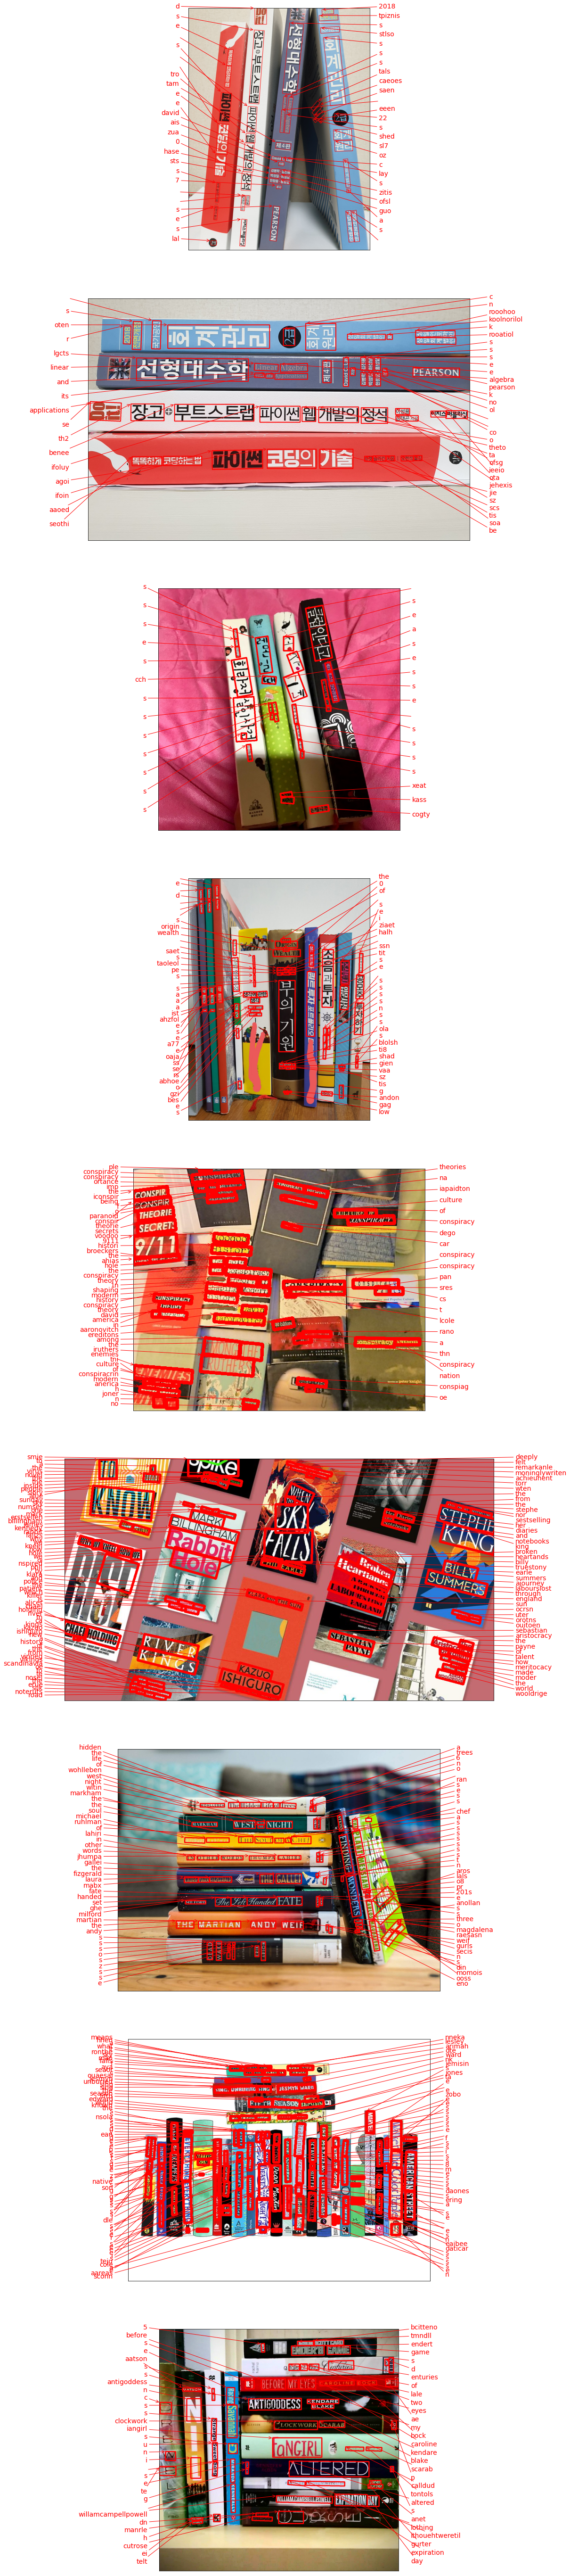

In [15]:
kerasocr=[]
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 100))
for idx, ax in enumerate(axs):
    kerasocr.append(len(prediction_groups[idx][0]))
    print(len(prediction_groups[idx][0]))
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0], ax=ax)

Tesseract

In [16]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output',n=0,lang='kor'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang,    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{n}_{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list
cropped_image_path_list=[] 
for i in range(len(image_paths)):
    lang='kor'
    if i >= 4:
        lang='eng'
    try:
        cropped_image_path_list.append(crop_word_regions(image_paths[i], work_dir,i,lang))
    except:
        cropped_image_path_list.append('')

/aiffel/aiffel/ocr_python/0_0000.png
/aiffel/aiffel/ocr_python/0_0001.png
/aiffel/aiffel/ocr_python/1_0000.png
/aiffel/aiffel/ocr_python/1_0001.png
/aiffel/aiffel/ocr_python/1_0002.png
/aiffel/aiffel/ocr_python/1_0003.png
/aiffel/aiffel/ocr_python/1_0004.png
/aiffel/aiffel/ocr_python/1_0005.png
/aiffel/aiffel/ocr_python/1_0006.png
/aiffel/aiffel/ocr_python/1_0007.png
/aiffel/aiffel/ocr_python/1_0008.png
/aiffel/aiffel/ocr_python/1_0009.png
/aiffel/aiffel/ocr_python/1_0010.png
/aiffel/aiffel/ocr_python/1_0011.png
/aiffel/aiffel/ocr_python/1_0012.png
/aiffel/aiffel/ocr_python/1_0013.png
/aiffel/aiffel/ocr_python/1_0014.png
/aiffel/aiffel/ocr_python/1_0015.png
/aiffel/aiffel/ocr_python/1_0016.png
/aiffel/aiffel/ocr_python/1_0017.png
/aiffel/aiffel/ocr_python/1_0018.png
/aiffel/aiffel/ocr_python/1_0019.png
/aiffel/aiffel/ocr_python/1_0020.png
/aiffel/aiffel/ocr_python/1_0021.png
/aiffel/aiffel/ocr_python/1_0022.png
/aiffel/aiffel/ocr_python/1_0023.png
/aiffel/aiffel/ocr_python/1_0024.png
/

In [17]:
def recognize_images(cropped_image_path_list,lang='kor'):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang,    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
tesseract=[]
for i in range(len(cropped_image_path_list)):
    lang='kor'
    if i >= 4:
        lang='eng'
    tesseract.append(len(cropped_image_path_list[i]))   
    print(len(cropped_image_path_list[i]))
    recognize_images(cropped_image_path_list[i],lang)

2
호


Done
34
다독


000

트므0

20000,

1065

1 7)10(7100710715

배려!

10|

도

16.

[4

!|여

이베

13

니타 더라라

1

전

|

,

100

20711

기거

ㄴㄴ

이

뜨

「(

0


농로

~ ____ㅠㅡㅠㅠㅠ&…ㅡㅠㅠㅠ - ^ ^ _ ^

이... 00000 빠따


론견ㅣ ㆍ 개

Done
0
Done
0
Done
22
-

\ hohe hake

THE \W

PO@ATANCE

eF BEING

PARANGIL

— aa "a FF


ey a Si ra ws


ENEMIES ie


| a

CONSPIRACY

ee latleh


|

ap


|

nUTTE

Ty,

Done
1

Done
32
P ey | | = I — ” ‘ | B 7 4 v

SL SS eS yy

ee ok | \1\\\\.

>» IN OTHER. WOR]

a

WOHLLEBEN

The

Hidde

1 Lite

ot

Trees

x


|

VIARKEHANM



aoc

ALN

NIGHT —

Ieee ee

—————

vere ee,

rae eee

IN

OTE R:

WORDS

JHUMEA


ae ase ee.

TAS

2.4.0 a

Done
0
Done
43
qo |


sat

Ci

gare

ie:

(OC K

eee rra.4

SCARAB

|


;


——

a



.

¢s79

[5

Sa


=

=

——

25

—

@

:

:


—

y


:

z

=

Janet

af

aoe

eT



Done


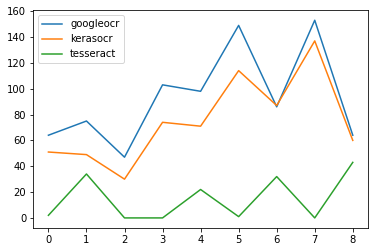

In [18]:
x_values = [0, 1, 2, 3, 4, 5, 6,7 ,8]
plt.plot(x_values, googleocr,label='googleocr')
plt.plot(x_values, kerasocr,label='kerasocr')
plt.plot(x_values, tesseract,label='tesseract')
plt.legend()
plt.show()

읽는 방향이 일정하지 않고 다양한 폰트가 섞여있는 도서 이미지에서 OCR 수행하였다.
문자인식 개수를 보았을 때 googleocr > kerasocr > tesseract로 googleocr 성능이 가장 뛰어났다. 결과 텍스트와 이미지를 비교해서 정확하게 인식하는지 보았을 때 googleocr이 가장 정확하게 인식하였다. kerasocr은 영어는 양호하게 인식하지만 한글인식이 안되었다. tesseract의 경우 이미지에 따라 인식을 못하거나 에러가 발생하여 문자인식 개수가 가장 낮고 정확도도 낮았다.
읽는 방향이 일정하지 않고 다양한 폰트가 섞여있는 문자를 인식하기에 googleocr이 가장 적합하다고 생각된다.